Georgios Nikolis, AEM: 209

In this notebook a water potability dataset is analyzed. In contrast to the first one, this will be in English for reusability in github, based on a question on the e-learning forum.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Baseline data analysis
Firstly, some general info about the dataset will be presented.

In [3]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


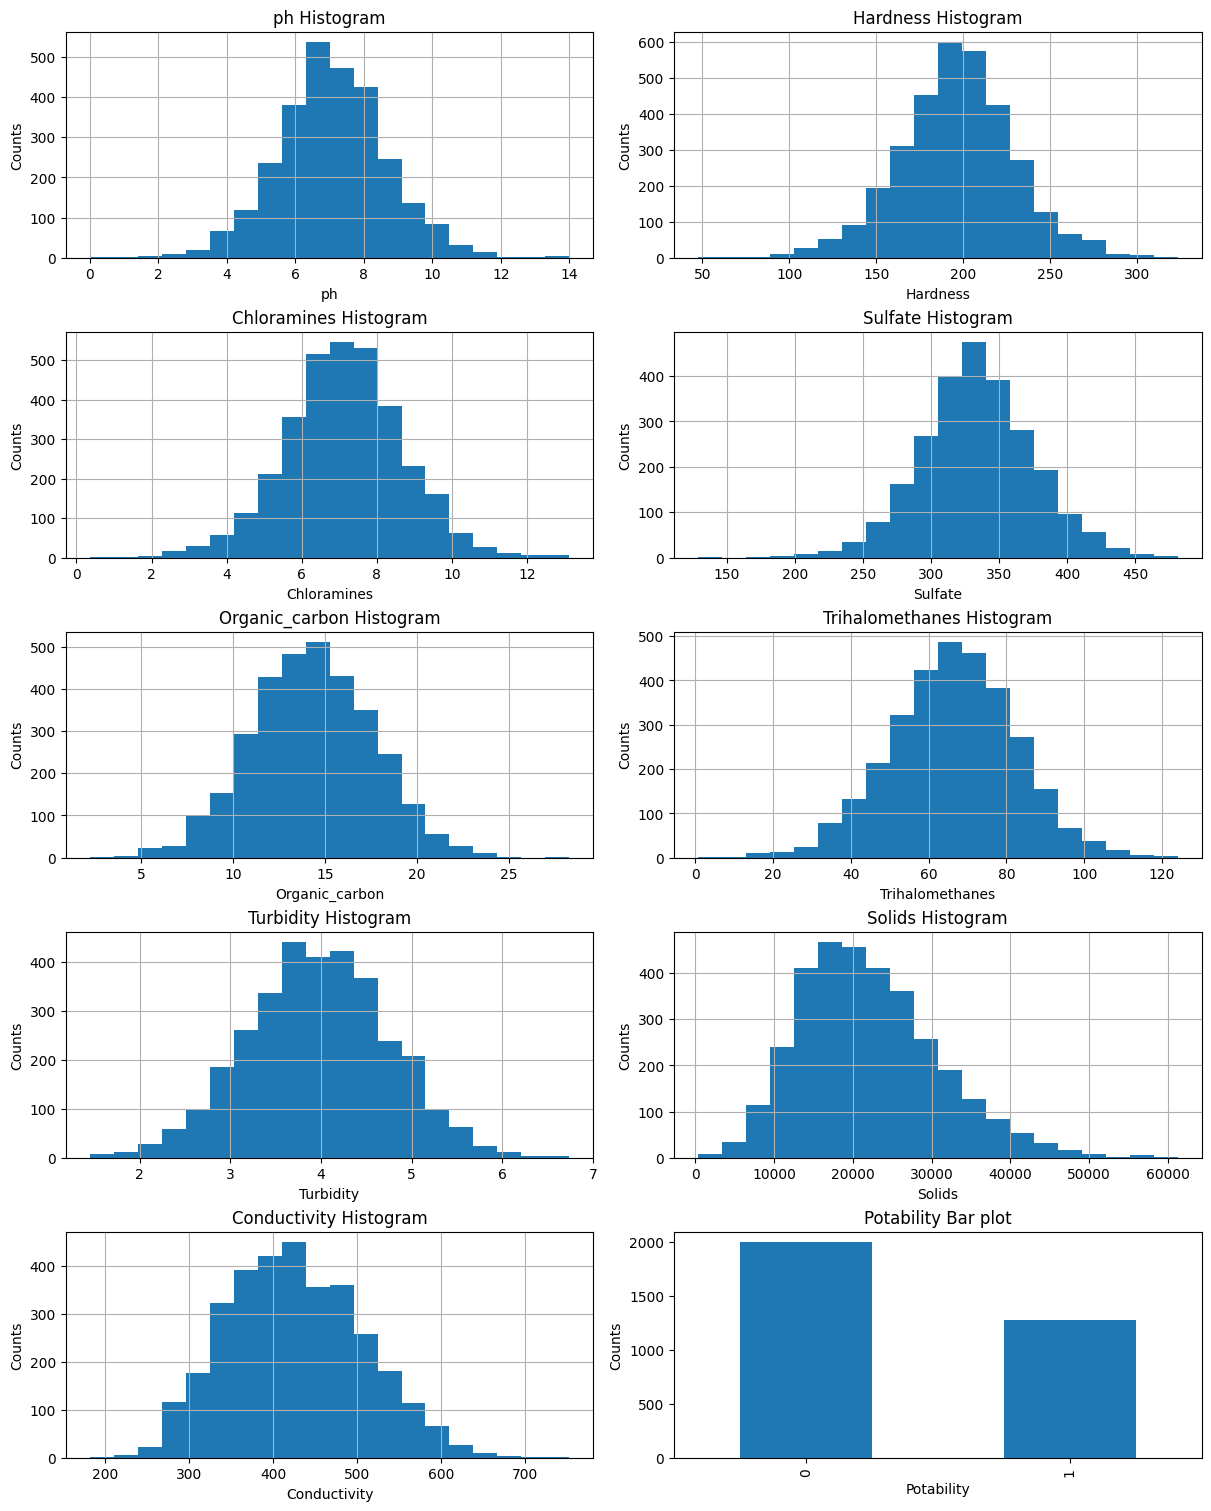

In [5]:
fig, axes = plt.subplots(5,2, figsize = (12,15),constrained_layout=True)

plt.subplot(5,2,1)
df['ph'].hist(bins=20)
plt.title('ph Histogram')
plt.xlabel('ph')
plt.ylabel('Counts')

plt.subplot(5,2,2)
df['Hardness'].hist(bins=20)
plt.title('Hardness Histogram')
plt.xlabel('Hardness')
plt.ylabel('Counts')

plt.subplot(5,2,3)
df['Chloramines'].hist(bins=20)
plt.title('Chloramines Histogram')
plt.xlabel('Chloramines')
plt.ylabel('Counts')

plt.subplot(5,2,4)
df['Sulfate'].hist(bins=20)
plt.title('Sulfate Histogram')
plt.xlabel('Sulfate')
plt.ylabel('Counts')

plt.subplot(5,2,5)
df['Organic_carbon'].hist(bins=20)
plt.title('Organic_carbon Histogram')
plt.xlabel('Organic_carbon')
plt.ylabel('Counts')

plt.subplot(5,2,6)
df['Trihalomethanes'].hist(bins=20)
plt.title('Trihalomethanes Histogram')
plt.xlabel('Trihalomethanes')
plt.ylabel('Counts')

plt.subplot(5,2,7)
df['Turbidity'].hist(bins=20)
plt.title('Turbidity Histogram')
plt.xlabel('Turbidity')
plt.ylabel('Counts')

plt.subplot(5,2,8)
df['Solids'].hist(bins=20)
plt.title('Solids Histogram')
plt.xlabel('Solids')
plt.ylabel('Counts')

plt.subplot(5,2,9)
df['Conductivity'].hist(bins=20)
plt.title('Conductivity Histogram')
plt.xlabel('Conductivity')
plt.ylabel('Counts')

plt.subplot(5,2,10)
df['Potability'].value_counts().plot.bar()
plt.title('Potability Bar plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.show()

In [6]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [7]:
potability_counts = df['Potability'].value_counts()
potability_counts

,count
Potability,
0,1998
1,1278


In [8]:
zero_potability = potability_counts.to_numpy()[0]
one_potability = potability_counts.to_numpy()[1]
zero_percentage  = (zero_potability / (zero_potability + one_potability)) * 100
one_percentage = (one_potability / (zero_potability + one_potability)) * 100
print(f'The percentage of potability = 0 is : {zero_percentage:.2f} %')
print(f'The percentage of potability = 1 is : {one_percentage:.2f} %')

The percentage of potability = 0 is : 60.99 %
The percentage of potability = 1 is : 39.01 %


# Data quality evaluation:
The overall shape of the variables is satisfactory, based on the above histograms. However, we notice that there are a lot of missing values in many features which will be problematic. Moreover, we have roughly a 60-40 % split between drinkable and not drinkable water which is not ideal, but not disastrous as well. Finally, it is worth mentioning that some variables have relatively small values around 5, while other have values about 100 times larger (or more), which is an indication that normalization may be needed.

Whether data quality is satisfactory or not depends on how we will use them. The amount of nan values is alarming, but there are ways to deal with it.
Proper preprocessing is necessary. In general, the dataset seems decent.

In [10]:
drinkable = df[ df['Potability'] == 1]
non_drinkable = df[ df['Potability'] == 0]

In [11]:
low_ph = (drinkable['ph'] < 6.5).sum()
acceptable_ph = ((drinkable['ph'] >= 6.5)&(drinkable['ph'] <= 8.5)).sum()
high_ph = (drinkable['ph'] > 8.5).sum()
total = len(drinkable)
print('Potability == 1 :')
print(f'The percentage of ph < 6.5 is : {((low_ph/total)*100):.2f} %')
print(f'The percentage of 6.5 <= ph <= 8.5 is : {((acceptable_ph/total)*100):.2f} %')
print(f'The percentage of ph > 8.5 is : {((high_ph/total)*100):.2f} %')


Potability == 1 :
The percentage of ph < 6.5 is : 27.86 %
The percentage of 6.5 <= ph <= 8.5 is : 45.62 %
The percentage of ph > 8.5 is : 12.68 %


In [12]:
low_ph = (non_drinkable['ph'] < 6.5).sum()
acceptable_ph = ((non_drinkable['ph'] >= 6.5)&(non_drinkable['ph'] <= 8.5)).sum()
high_ph = (non_drinkable['ph'] > 8.5).sum()
total = len(non_drinkable)
print('Potability == 0 :')
print(f'The percentage of ph < 6.5 is : {((low_ph/total)*100):.2f} %')
print(f'The percentage of 6.5 <= ph <= 8.5 is : {((acceptable_ph/total)*100):.2f} %')
print(f'The percentage of ph > 8.5 is : {((high_ph/total)*100):.2f} %')

Potability == 0 :
The percentage of ph < 6.5 is : 30.63 %
The percentage of 6.5 <= ph <= 8.5 is : 37.29 %
The percentage of ph > 8.5 is : 16.37 %


We can observe that the belief that potable water should have ph values between 6.5 and 8.5 is not verified by this dataset. As seen in the above cells, only 45% of the drinkable water observations is in that range, while 37% of the non drinkable water observations also fall in that range.

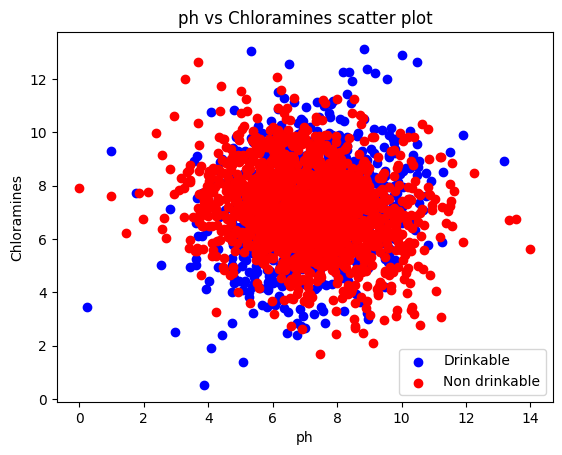

In [13]:
plt.scatter(drinkable['ph'], drinkable['Chloramines'],c='blue',label='Drinkable')
plt.scatter(non_drinkable['ph'], non_drinkable['Chloramines'],c='red',label='Non drinkable')

plt.title('ph vs Chloramines scatter plot')
plt.xlabel('ph')
plt.ylabel('Chloramines')
plt.legend()
plt.show()

In the above scatter plot we aim to evaluate the guideline that Chloramines should be up to 4 ppm. As seen, this is not verified by the dataset. The observations seem to group together in both potability labels and centered in Chloramines values higher than 4.

Filling missing values with mean():

In [14]:
df_clean = df.fillna(df.mean())
df_clean.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# Decision Tree Classifier

In the following cells we will fit the data into a DTC to classify water into drinkable and non-drinkable.

In [15]:
input_df = df_clean.drop(columns=['Potability'])
targets_df = df_clean['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

In [16]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

In [17]:
clf = DecisionTreeClassifier(random_state=seed)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
y_pred = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Train set accuracy: {accuracy*100:.2f}')

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy*100:.2f}')

Train set accuracy: 100.00
Test set accuracy: 57.48


We can see that the classifier overfitts the training dataset.

# Hyperparameter grid search

In the following cell we will do a grid search to find the optimal parameters for the tree. The results will be saved in a new dataframe for evaluation.

Afterwards we will select the parameter combination with the highest accuracy on the test set while max_depth = 3.

In [19]:
criterions = ['gini', 'entropy']
max_depths = [None, 3, 5]
splits = [2 ,5]
leafs = [1, 2]
max_features = [None, 'sqrt']
cost_complexities = [0, 0.01]

result_df_columns = ['train_accuracy' , 'test_accuracy', 'criterion' ,'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features','ccp_alpha']
results_df = pd.DataFrame(columns=result_df_columns)

for cri in criterions:
  for depth in max_depths:
    for split in splits:
      for leaf in leafs:
        for max_feature in max_features:
          for cost_complexity in cost_complexities:
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

            clf = DecisionTreeClassifier(random_state=seed,criterion = cri, max_depth = depth, min_samples_split =split , min_samples_leaf=leaf, max_features=max_feature, ccp_alpha= cost_complexity)
            clf.fit(x_train, y_train)

            y_pred_train = clf.predict(x_train)
            train_accuracy = accuracy_score(y_train, y_pred_train)*100

            y_pred_test = clf.predict(x_test)
            test_accuracy = accuracy_score(y_test, y_pred_test)*100

            new_item = {'train_accuracy':train_accuracy , 'test_accuracy':test_accuracy, 'criterion': cri,'max_depth':depth, 'min_samples_split':split, 'min_samples_leaf':leaf, 'max_features':max_feature,'ccp_alpha':cost_complexity}
            temp_df = pd.DataFrame([new_item])
            results_df = pd.concat([results_df,temp_df])


results_df


/tmp/ipython-input-212530830.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df,temp_df])


,train_accuracy,test_accuracy,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha
0,100.000000,57.477111,gini,None,2,1,None,0
0,60.532054,62.054934,gini,None,2,1,None,0.01
0,100.000000,62.258393,gini,None,2,1,sqrt,0
0,60.532054,62.054934,gini,None,2,1,sqrt,0.01
0,95.159180,58.189217,gini,None,2,2,None,0
...,...,...,...,...,...,...,...,...
0,62.014828,62.665310,entropy,5,5,1,sqrt,0.01
0,67.117314,65.513733,entropy,5,5,2,None,0
0,62.014828,62.665310,entropy,5,5,2,None,0.01
0,64.282599,62.054934,entropy,5,5,2,sqrt,0


In [20]:
selected_depth = results_df[ results_df['max_depth'] == 3]
selected_depth

,train_accuracy,test_accuracy,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha
0,63.410379,63.275687,gini,3,2,1,None,0
0,60.532054,62.054934,gini,3,2,1,None,0.01
0,63.061491,62.767040,gini,3,2,1,sqrt,0
0,60.532054,62.054934,gini,3,2,1,sqrt,0.01
0,63.366768,63.275687,gini,3,2,2,None,0
0,60.532054,62.054934,gini,3,2,2,None,0.01
0,63.061491,62.767040,gini,3,2,2,sqrt,0
0,60.532054,62.054934,gini,3,2,2,sqrt,0.01
0,63.410379,63.275687,gini,3,5,1,None,0
0,60.532054,62.054934,gini,3,5,1,None,0.01


In [21]:
highest_accuracy = selected_depth['test_accuracy'].max()
best_parameters = selected_depth[selected_depth['test_accuracy']==highest_accuracy]
best_parameters


,train_accuracy,test_accuracy,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha
0,64.108155,63.987792,entropy,3,2,1,None,0
0,64.108155,63.987792,entropy,3,2,2,None,0
0,64.108155,63.987792,entropy,3,5,1,None,0
0,64.108155,63.987792,entropy,3,5,2,None,0


Since there are multiple parameters with the best accuracy, we will select the the least 'min_samples_leaf'. Therefore the first row.

In [22]:
parameters_array  = best_parameters.iloc[0].values
parameters_array

array([np.float64(64.10815525512429), np.float64(63.98779247202442),
       'entropy', 3, 2, 1, None, 0], dtype=object)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

clf = DecisionTreeClassifier(random_state=seed,criterion = parameters_array[2], max_depth = parameters_array[3], min_samples_split =parameters_array[4] , min_samples_leaf=parameters_array[5], max_features=parameters_array[6], ccp_alpha= parameters_array[7])
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)*100

y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)*100

print(f'Train set accuracy: {train_accuracy:.2f}')
print(f'Test set accuracy: {test_accuracy:.2f}')



Train set accuracy: 64.11
Test set accuracy: 63.99


We can see that accuracy on the set has increased.

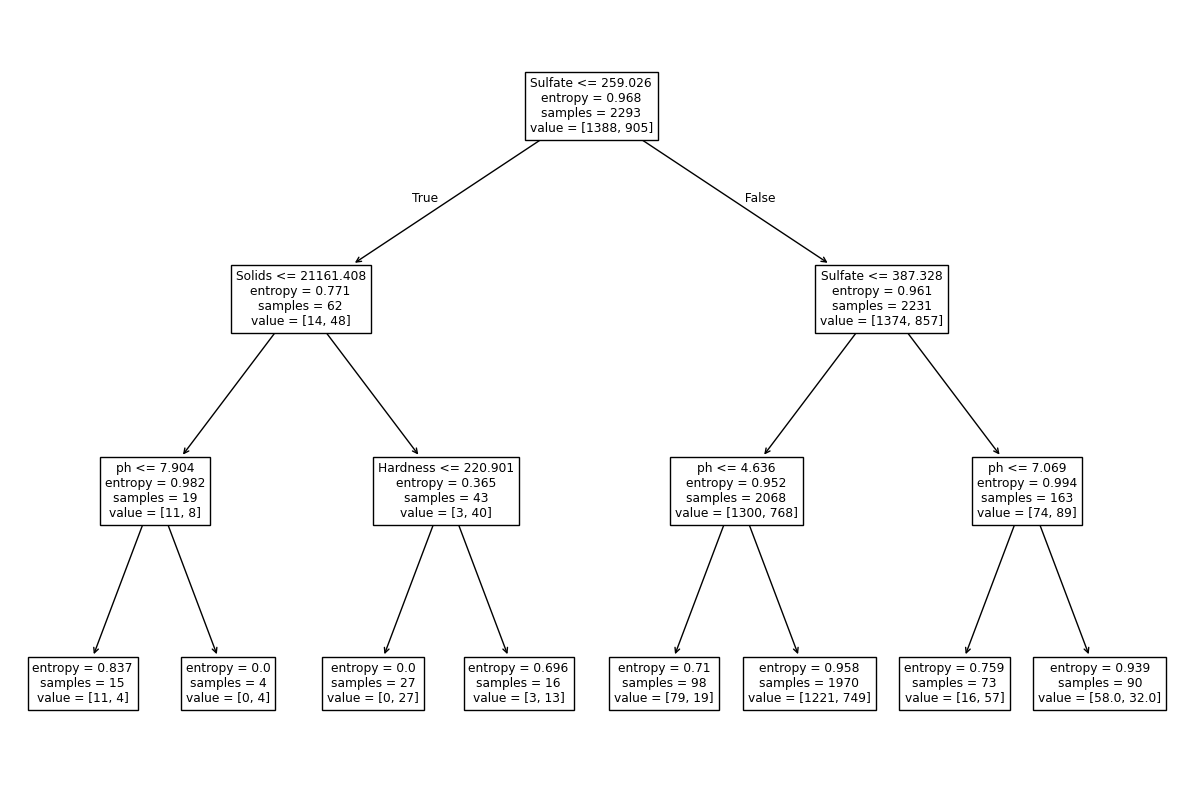

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,feature_names = input_df.columns)
plt.show()

From the above plot we can see the structure of the entire tree. The parameter that divides the data the best way is the root node, which in this case is 'Sulfate'. We can see that there is a rule inside every node that determines the path that will be followed for a new observation.

It is worth mentioning that the Sulfate will be checked again if the root nodes' result is False. Afterwards the ph is checked and detemines the outcome. On the other side of the tree the initial Sulfate check is followed by 'Solids'. Later, the ph and Hardness are the two deciding variables.

It can be observed that many final leafs do not have clear separations (they are not pure). This could be a consequence of the fixed max depth that we chose. This could impose limitations on how well the tree 'splits' the classes and maybe should be re-examined.

In the following cells we will select the tree with the best test accuracy regardless of its depth and we will retrain it. Afterwards we will plot the feature significance of each variable.

In [25]:
highest_accuracy = results_df['test_accuracy'].max()
best_parameters = results_df[results_df['test_accuracy']==highest_accuracy]
best_parameters

,train_accuracy,test_accuracy,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha
0,67.117314,65.513733,entropy,5,2,2,None,0
0,67.117314,65.513733,entropy,5,5,2,None,0


In [26]:
parameters_array  = best_parameters.iloc[0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

clf = DecisionTreeClassifier(random_state=seed,criterion = parameters_array[2], max_depth = parameters_array[3], min_samples_split =parameters_array[4] , min_samples_leaf=parameters_array[5], max_features=parameters_array[6], ccp_alpha= parameters_array[7])
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)*100

y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)*100

print(f'Train set accuracy: {train_accuracy:.2f}')
print(f'Test set accuracy: {test_accuracy:.2f}')

Train set accuracy: 67.12
Test set accuracy: 65.51


We can see that accuacy has increased with a bigger max depth.

In [27]:
importances = clf.feature_importances_
importances

array([0.24476829, 0.09139155, 0.08640041, 0.19195573, 0.29895618,
       0.01286442, 0.        , 0.05353648, 0.02012694])

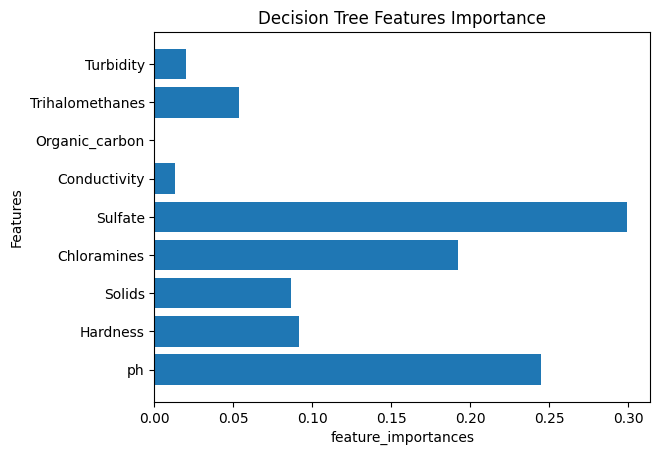

In [28]:
plt.barh(input_df.columns, importances)
plt.title('Decision Tree Features Importance')
plt.xlabel('feature_importances')
plt.ylabel('Features')
plt.show()

If we consider a device that classifies water into drinkable and non-drinkable and the restriction that the device can handle 5 chemicals, then the selected ones would be those with the highest importance (Sulfate, pH, Chloramines, Hardness, Solids)

# Random Forest Classifier

In the following cells, we will use the Random Forest Classifier and compare.

In theory, the RFC could achieve higher accuracy (compared to Decision Trees) beacuse it uses many different trees to boost its performance. In addition, it is less likely to overfit the data and can handle outliers better, beacuse of its ensemble approach.



In [29]:
criterions = ['gini', 'entropy']
max_depths = [None, 3, 5]
splits = [2 ,5]
leafs = [1, 2]
max_features = [None, 'sqrt']
cost_complexities = [0, 0.01]
n_estimators = [50, 100, 200]

result_df_columns = ['train_accuracy' , 'test_accuracy', 'criterion' ,'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features','ccp_alpha','n_estimators']
results_df = pd.DataFrame(columns=result_df_columns)

for cri in criterions:
  for depth in max_depths:
    for split in splits:
      for leaf in leafs:
        for max_feature in max_features:
          for cost_complexity in cost_complexities:
            for number_of_estimators in n_estimators:
              x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

              clf = RandomForestClassifier(n_estimators= number_of_estimators, random_state=seed,criterion = cri, max_depth = depth, min_samples_split =split , min_samples_leaf=leaf, max_features=max_feature, ccp_alpha= cost_complexity)
              clf.fit(x_train, y_train)

              y_pred_train = clf.predict(x_train)
              train_accuracy = accuracy_score(y_train, y_pred_train)*100

              y_pred_test = clf.predict(x_test)
              test_accuracy = accuracy_score(y_test, y_pred_test)*100

              new_item = {'train_accuracy':train_accuracy , 'test_accuracy':test_accuracy, 'criterion': cri,'max_depth':depth, 'min_samples_split':split, 'min_samples_leaf':leaf, 'max_features':max_feature,'ccp_alpha':cost_complexity,'n_estimators':number_of_estimators}
              temp_df = pd.DataFrame([new_item])
              results_df = pd.concat([results_df,temp_df])


results_df

/tmp/ipython-input-3696361639.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df,temp_df])


,train_accuracy,test_accuracy,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,n_estimators
0,100.000000,67.243133,gini,None,2,1,None,0,50
0,100.000000,67.751780,gini,None,2,1,None,0,100
0,100.000000,68.565615,gini,None,2,1,None,0,200
0,61.971217,62.665310,gini,None,2,1,None,0.01,50
0,61.971217,62.665310,gini,None,2,1,None,0.01,100
...,...,...,...,...,...,...,...,...,...
0,68.120366,65.208545,entropy,5,5,2,sqrt,0,100
0,68.294810,64.801628,entropy,5,5,2,sqrt,0,200
0,62.363716,62.868769,entropy,5,5,2,sqrt,0.01,50
0,62.363716,62.868769,entropy,5,5,2,sqrt,0.01,100


In [30]:
highest_accuracy = results_df['test_accuracy'].max()
best_parameters = results_df[results_df['test_accuracy']==highest_accuracy]
best_parameters

,train_accuracy,test_accuracy,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,n_estimators
0,100.0,69.786368,gini,None,2,1,sqrt,0,100


In [31]:
parameters_array  = best_parameters.iloc[0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

clf = RandomForestClassifier(random_state=seed,criterion = parameters_array[2], max_depth = parameters_array[3], min_samples_split =parameters_array[4] , min_samples_leaf=parameters_array[5], max_features=parameters_array[6], ccp_alpha= parameters_array[7],n_estimators=parameters_array[8])
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)*100

y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)*100

print(f'Train set accuracy: {train_accuracy:.2f}')
print(f'Test set accuracy: {test_accuracy:.2f}')

Train set accuracy: 100.00
Test set accuracy: 69.79


# Considering which is more important: potable or non-potable water accuracy?

Let's consider that we work at a company that manufactures a device that classifies water as potable or not.

Drinking non potable water can have detrimental consequencies to the health of a human being and could even lead to death. Therefore, it is of paramount importance to only classify drinking water as potable. In the event that non-drinkable water is classified as drinkable, then we risk causing severe problems to those who consume it, as well as facing serious legal complications as a company. On the contrary, if drinkable water is classified as non-drinkable, then we only suffer financial damages, since the water would not be consumed.

Consequently, it is preferred for a model to classify correctly the non drinkable water. We need to ensure that non drinkable water is accurately classified as non potable.

# Legal aspect: Decision Tree or Random Forest?

Based on the above experiments we determined that Random Forest has higher accuracy. However, since the decision of the device could be life-critical, there is another more important aspect to consider: the explainability. The Decision Tree may have inferior accuracy, but it provides the ability to describe how it made its decision by showing the path that it followed, the rules and the logic behind it. This provides the opportunity to prevent mistakes by re-evaluating its missclassifications. Moreover, together with a team of domain experts, we could enhance its accuracy by closely evaluating data quality, selection and its rules.

As a consequence, the fact that the Random Forest does not provide the ability to explain its decision making process makes it untrustworthy and cannot be considered for such a critical task, especially when its accuracy is far from perfect. Thus, we should focus on the Decision Tree and try to improve it.
